<a href="https://colab.research.google.com/github/veliaaf/big-data/blob/main/latihan03_scikit-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Representation in Scikit-Learn**

---
Machine learning adalah tentang membuat model dari data: untuk alasan itu, kita akan mulai
membahas bagaimana data dapat direpresentasikan agar dapat dipahami oleh komputer.
Cara terbaik untuk memikirkan data dalam Scikit-Learn adalah dari segi tabel data.


---
Data as table

---
Tabel dasar adalah kisi data dua dimensi, di mana baris mewakili satu per satu
elemen set data, dan kolom mewakili jumlah yang terkait dengan masing-masing
elemen-elemen ini. Misalnya, pertimbangkan kumpulan data Iris, yang terkenal dianalisis oleh Ronald
Fisher pada tahun 1936. Kita dapat mendownload dataset ini dalam bentuk Pandas DataFrame
menggunakan perpustakaan Seaborn:



In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Features Matrix


---
Tata letak tabel ini memperjelas bahwa informasi dapat dianggap sebagai dua dimensi
array atau matriks numerik, yang akan kita sebut matriks fitur. Matriks fitur
diasumsikan menjadi dua dimensi, dengan bentuk [n_samples, n_features], dan is
paling sering dimuat dalam array NumPy atau Pandas DataFrame, meskipun beberapa Scikit-
Model yang dipelajari juga menerima matriks renggang SciPy.

---
Target Array


---
Array target biasanya satu dimensi,
dengan panjang n_samples, dan umumnya terdapat dalam array NumPy atau Pandas
Seri. Array target mungkin memiliki nilai numerik kontinu, atau diskrit
kelas / label. Sementara beberapa estimator Scikit-Learn menangani beberapa nilai target di
dalam bentuk array target dua dimensi [n_samples, n_t target],


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


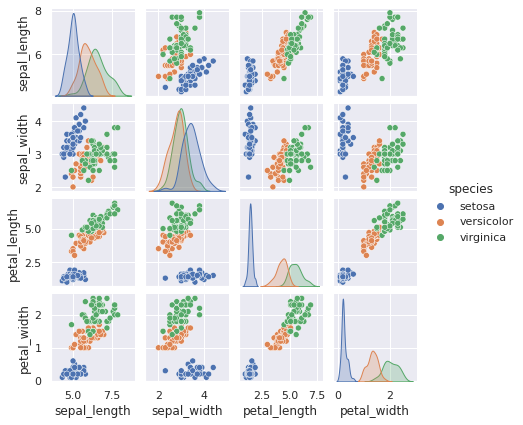

In [3]:
%matplotlib inline
import seaborn as sns; 
sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

**Scikit-Learn's Estimator API**

---
Supervised learning example : Simple Linear Regression

---
Sebagai contoh dari proses ini, mari kita pertimbangkan regresi linier sederhana — yaitu,
kasus umum pemasangan garis ke data x, y.



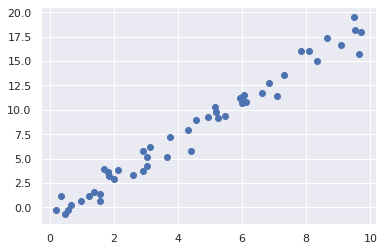

In [6]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

1. Memilih class model

---
Dalam Scikit-Learn, setiap kelas model diwakili oleh kelas Python.Misalnya, jika kita ingin menghitung model regresi linier sederhana, kita bisa
impor kelas regresi linier:


In [7]:
from sklearn.linear_model import LinearRegression

2. Memilih memilih hyperparameter.

---
Pilihan ini sering kali direpresentasikan sebagai hyperparameter, atau
parameter yang harus ditetapkan sebelum model cocok dengan data. Di Scikit-Learn, kami
pilih hyperparameter dengan meneruskan nilai pada contoh model.


In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

3. Menyusun data menjadi matriks fitur dan vektor target.

---
Sebelumnya kami merinci representasi data Scikit-Learn, yang membutuhkan file
matriks fitur dua dimensi dan larik target satu dimensi. Ini kami
variabel target y sudah dalam bentuk yang benar (array length-n_samples), tapi kita
perlu memijat data x untuk membuatnya menjadi matriks dengan ukuran [n_samples, n_features].
Dalam kasus ini, ini berarti pembentukan kembali sederhana dari array satu dimensi:


In [9]:
X = x[:, np.newaxis]
X.shape

(50, 1)

4. paskan model dengan data Anda

---
Sekarang saatnya menerapkan model kita ke data. Ini bisa dilakukan dengan fit ()
metode model:


In [10]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
model.coef_

array([1.9776566])

In [12]:
model.intercept_

-0.9033107255311146

5. Memprediksi label untuk data yang tidak diketahui.

---
Setelah model dilatih, tugas utama machine learning yang diawasi adalah
mengevaluasinya berdasarkan apa yang dikatakan tentang data baru yang bukan bagian dari pelatihan
set. Di Scikit-Learn, kita bisa melakukan ini menggunakan metode predict (). Demi
contoh ini, "data baru" kami akan menjadi kisi nilai x, dan kami akan menanyakan y apa
menghargai model yang memprediksi:


In [13]:
xfit = np.linspace(-1, 11)

In [14]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

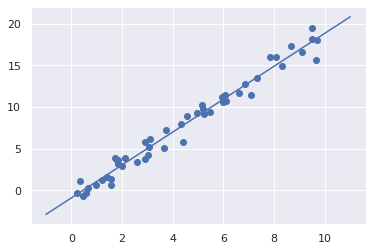

In [15]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Supervised liearning example : Iris classification

---
Kami ingin mengevaluasi model pada data yang belum pernah dilihat sebelumnya, jadi kami akan melakukannya
membagi data menjadi satu set pelatihan dan satu set pengujian. Ini bisa dilakukan dengan tangan, tapi memang begitu
lebih nyaman untuk menggunakan fungsi utilitas train_test_split:


In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
random_state=1)

In [18]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB() # 2. instantiate model
model.fit(Xtrain, ytrain) # 3. fit model to data
y_model = model.predict(Xtest) # 4. predict on new data

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Unsupervised learning example : Iris dimensionality

---
Di sini kita akan menggunakan analisis komponen utama (PCA; lihat “Secara Mendalam: Komponen Utama
Analysis yang merupakan teknik reduksi dimensi linier cepat.
Kami akan meminta model untuk mengembalikan dua komponen — yaitu, dua dimensi
representasi data.


In [20]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimensions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


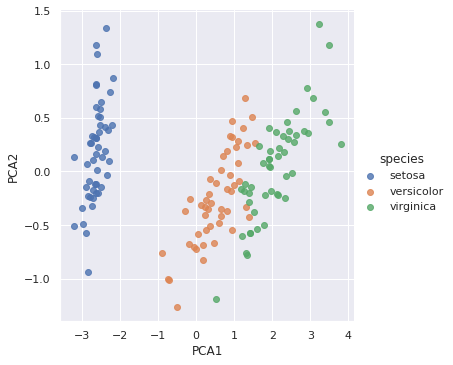

In [21]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

Unsupervised learning : Iris clustering

---

Selanjutnya mari kita lihat penerapan pengelompokan ke data Iris. Algoritme pengelompokan mencoba
untuk menemukan kelompok data yang berbeda tanpa mengacu pada label apa pun.

In [25]:
from sklearn import mixture # 1. Choose the model class
model = mixture.GaussianMixture(n_components=3, covariance_type='full') # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris) # 4. Determine cluster labels

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


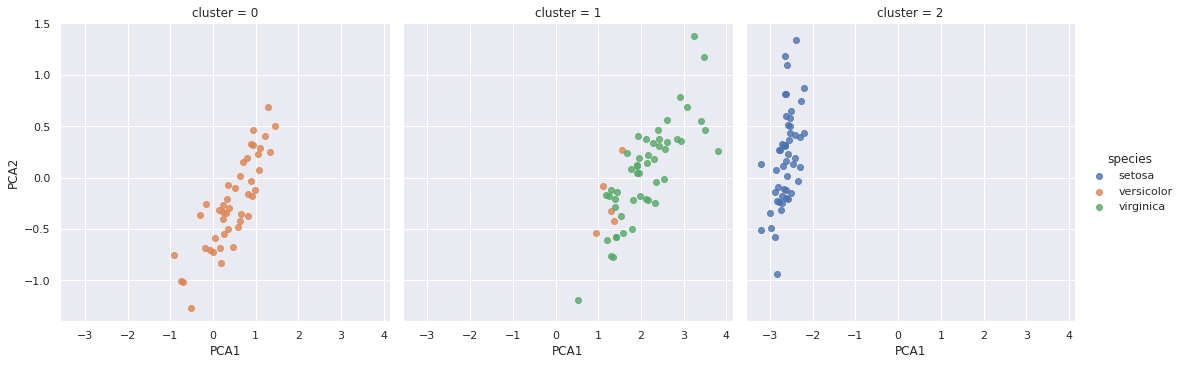

In [26]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
col='cluster', fit_reg=False);

**Application : Exploring Handwritten Digits**

---
Untuk mendemonstrasikan prinsip-prinsip ini pada masalah yang lebih menarik, mari kita pertimbangkan salah satunya
bagian dari masalah pengenalan karakter optik: identifikasi tulisan tangan
digit. Di alam liar, masalah ini melibatkan penempatan dan pengidentifikasian karakter di
sebuah gambar. Di sini kita akan mengambil jalan pintas dan menggunakan kumpulan angka yang telah diformat sebelumnya dari Scikit-Learn,
yang dibangun ke dalam perpustakaan.


---
Loading and visualizing the digits data

---
Kami akan menggunakan antarmuka akses data Scikit-Learn dan melihat data ini:



In [27]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

Data citra adalah array tiga dimensi: 1.797 sampel, masing-masing terdiri dari file
8 × 8 kotak piksel. Mari kita visualisasikan seratus yang pertama seperti gambar di bawah ini :

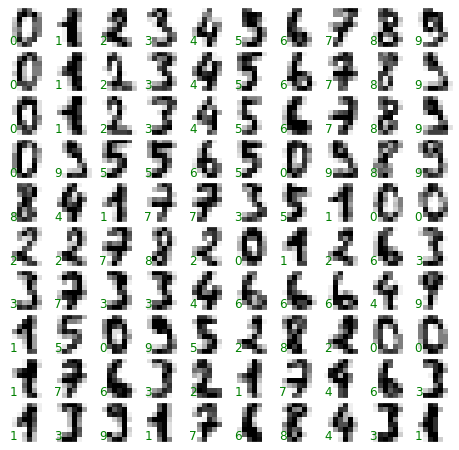

In [28]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
        subplot_kw={'xticks':[], 'yticks':[]},
        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(digits.target[i]),
    transform=ax.transAxes, color='green')

In [29]:
X = digits.data
X.shape

(1797, 64)

In [30]:
y = digits.target
y.shape

(1797,)

Unsupervised learning: Dimensionality reduction

---
Kami ingin memvisualisasikan poin kami dalam ruang parameter 64 dimensi, tapi kenyataannya memang demikian
sulit untuk secara efektif memvisualisasikan titik dalam ruang berdimensi tinggi seperti itu. Sebaliknya, kami akan melakukannya
kurangi dimensi menjadi 2, menggunakan metode tanpa pengawasan. Di sini, kita akan menggunakan algoritme pembelajaran berjenis yang disebut Isomap


In [31]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

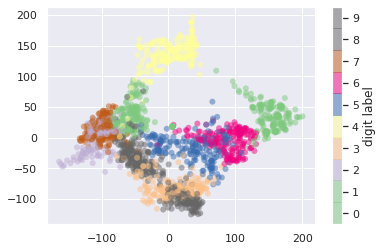

In [34]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Classification on digits

---
Mari terapkan algoritme klasifikasi ke angka. Seperti data Iris sebelumnya, kami
akan membagi data menjadi set pelatihan dan pengujian, dan menyesuaikan model Gaussian naive Bayes:


In [35]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [36]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Sekarang kita telah memprediksi model kita, kita dapat mengukur akurasinya dengan membandingkan
nilai sebenarnya dari tes yang ditetapkan ke prediksi:

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Dengan model yang sangat sederhana ini, kami menemukan akurasi sekitar 80% untuk klasifikasi dari angka. Namun, angka tunggal ini tidak memberi tahu kita di mana kesalahan kita—
satu cara yang bagus untuk melakukannya adalah dengan menggunakan matriks konfusi, yang dapat kita hitung
Scikit-Learn dan plot dengan Seaborn

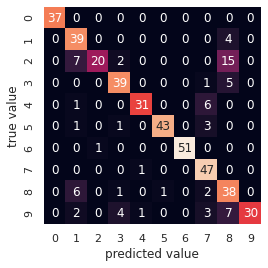

In [38]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Ini menunjukkan kepada kita di mana titik-titik yang salah diberi label cenderung berada: misalnya, sejumlah besar
dua di sini salah diklasifikasikan sebagai satu atau delapan. Cara lain untuk mendapatkan intuisi
karakteristik model adalah memplot input lagi, dengan label prediksi mereka.
Kami akan menggunakan hijau untuk label yang benar, dan merah untuk label yang salah.

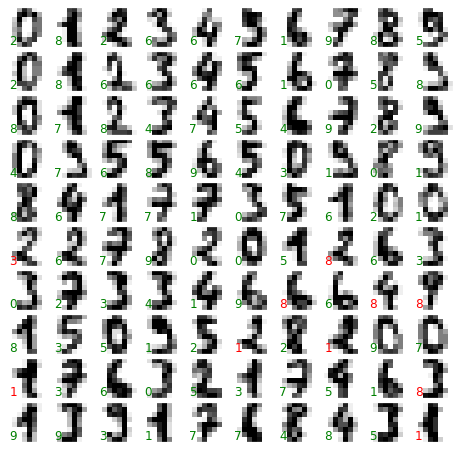

In [39]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
        transform=ax.transAxes,
        color='green' if (ytest[i] == y_model[i]) else 'red')

Model validation the wrong way

---
Mari kita tunjukkan pendekatan naif untuk validasi menggunakan data Iris, yang kita lihat
di bagian sebelumnya. Kami akan mulai dengan memuat data:


In [41]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

Selanjutnya kami memilih model dan hyperparameter. Di sini kita akan menggunakan pengklasifikasi k-neighbours
dengan n_neighbours = 1. Ini adalah model yang sangat sederhana dan intuitif yang mengatakan "label dari
titik yang tidak diketahui sama dengan label titik pelatihan terdekatnya ”:

In [42]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

Kemudian kami melatih model, dan menggunakannya untuk memprediksi label untuk data yang sudah kami ketahui:

In [43]:
model.fit(X, y)
y_model = model.predict(X)

Akhirnya, kami menghitung pecahan dari titik yang diberi label dengan benar:

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

Model validation the right way : Holdout sets

---
Kita bisa lebih memahami performa model menggunakan apa
dikenal sebagai set pisahan; artinya, kami menahan beberapa subset data dari pelatihan
model, lalu gunakan set pisahan ini untuk memeriksa kinerja model. Kita dapat
lakukan pemisahan ini menggunakan utilitas train_test_split di Scikit-Learn:


In [46]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
train_size=0.5)
# fit the model on one set of data
model.fit(X1, y1)
# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

Model validation via cross-validation

---
Satu kelemahan menggunakan set pisahan untuk validasi model adalah bahwa kita kehilangan a
bagian dari data kami untuk pelatihan model. Dalam kasus sebelumnya, separuh kumpulan data melakukannya
tidak berkontribusi pada pelatihan model! Ini tidak optimal, dan dapat menyebabkan masalah—
terutama jika kumpulan awal data pelatihan kecil.
Salah satu cara untuk mengatasinya adalah dengan menggunakan validasi silang — yaitu, melakukan urutan pencocokan
di mana setiap subset data digunakan sebagai set pelatihan dan sebagai set validasi.
Di sini kami melakukan dua uji validasi, secara bergantian menggunakan setiap setengah data sebagai pisahan
set. Menggunakan data terpisah dari sebelumnya, kita bisa menerapkannya seperti ini:


In [47]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

Di sini kami membagi data menjadi lima kelompok, dan menggunakan masing-masing secara bergiliran untuk mengevaluasi
model fit pada 4/5 data lainnya. Ini akan agak membosankan untuk dilakukan dengan tangan,
sehingga kita bisa menggunakan rutinitas kenyamanan cross_val_score Scikit-Learn untuk melakukannya
secara ringkas:

In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

Scikit-Learn mengimplementasikan sejumlah skema validasi silang yang khususnya berguna
situasi; ini diimplementasikan melalui iterator di modul cross_validation.
Misalnya, kami mungkin ingin beralih ke kasus ekstrem di mana nomor kami
lipatan sama dengan jumlah titik data; artinya, kami berlatih di semua poin kecuali satu poin
setiap percobaan. Jenis validasi silang ini dikenal sebagai validasi silang tinggalkan satu kali,
dan dapat digunakan sebagai berikut:

In [53]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Karena kami memiliki 150 sampel, validasi silang leave-one-out menghasilkan skor untuk 150
uji coba, dan skor menunjukkan prediksi yang berhasil (1.0) atau tidak berhasil (0.0).
Mengambil rata-rata ini memberikan perkiraan tingkat kesalahan:

In [54]:
scores.mean()

0.96

Validation curves in sckit-learn

---
Kita dapat menggeneralisasi ini ke sejumlah fitur polinomial. Di Scikit-Learn, kami bisa
menerapkan ini dengan regresi linier sederhana yang dikombinasikan dengan preprocessor polinomial.
Kami akan menggunakan pipeline untuk merangkai operasi ini bersama-sama


In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree),
                      LinearRegression(**kwargs))

Sekarang mari kita buat beberapa data yang akan kita sesuaikan dengan model kita:

In [57]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
  # randomly sample the data
  rng = np.random.RandomState(rseed)
  X = rng.rand(N, 1) ** 2
  y = 10 - 1. / (X.ravel() + 0.1)
  if err > 0:
    y += err * rng.randn(N)
  return X, y
X, y = make_data(40)

Kami sekarang dapat memvisualisasikan data kami, bersama dengan kesesuaian polinomial beberapa derajat

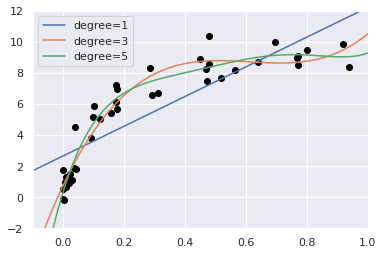

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

Kita dapat membuat kemajuan dalam hal ini dengan memvisualisasikan kurva validasi khusus ini
data dan model; kita bisa melakukan ini secara langsung menggunakan kemudahan validation_curve
rutinitas yang disediakan oleh Scikit-Learn. Diberikan model, data, nama parameter, dan a
rentang untuk dijelajahi, fungsi ini akan secara otomatis menghitung skor pelatihan dan
skor validasi di seluruh rentang

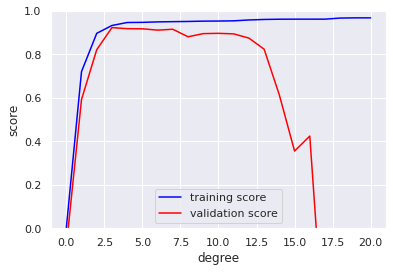

In [60]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree',
                                          degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

Dari kurva validasi, kita dapat membaca bahwa trade-off yang optimal antara bias
dan varians ditemukan untuk polinomial orde tiga; kami dapat menghitung dan menampilkan ini
menyesuaikan data asli sebagai berikut

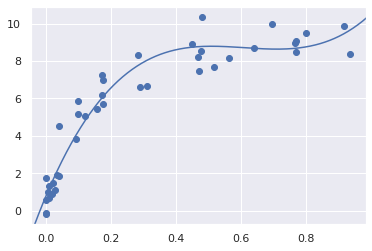

In [61]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

**Learning Curves**

---
Salah satu aspek penting dari kompleksitas model adalah model yang optimal secara umum
bergantung pada ukuran data pelatihan Anda. Misalnya, mari buat set data baru
dengan faktor lima poin lagi


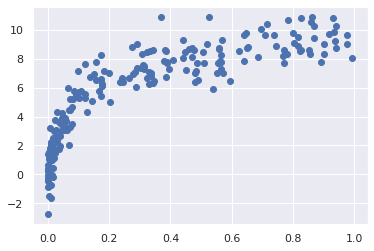

In [62]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

Kami akan menduplikasi kode sebelumnya untuk memplot kurva validasi untuk kumpulan data yang lebih besar ini;
sebagai referensi, mari kita plot hasil sebelumnya juga

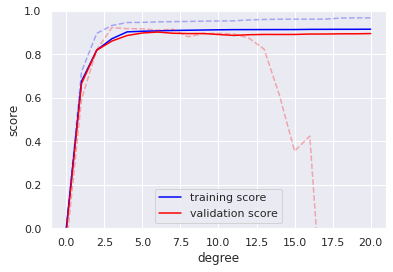

In [64]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                          'polynomialfeatures__degree',
                                          degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue',
        label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,
        linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,
        linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

Learning curves in scikit-learn

---
Scikit-Learn menawarkan utilitas yang nyaman untuk menghitung kurva pembelajaran seperti itu dari Anda
model; di sini kita akan menghitung kurva pembelajaran untuk dataset asli kita dengan urutan kedua
model polinomial dan polinomial orde sembilan


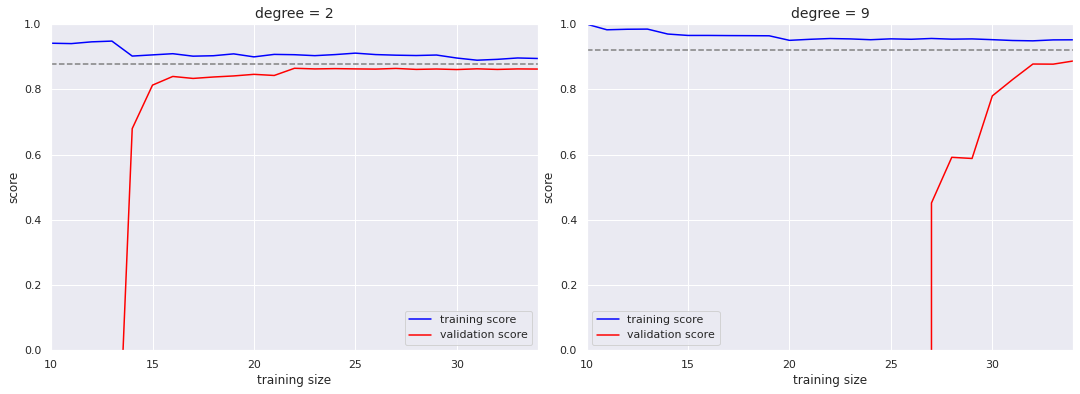

In [69]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                        X, y, cv=7,
                                        train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
                linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

Validation in practice : Grid Search

---
Scikit-Learn menyediakan alat otomatis untuk melakukan ini di modul grid_search. Disini adalah
contoh penggunaan pencarian grid untuk menemukan model polinomial yang optimal. Kami akan
mengeksplorasi kisi tiga dimensi fitur model — yaitu, derajat polinomial,
bendera memberi tahu kami apakah akan memasang intersep, dan bendera memberi tahu kami apakah akan menormalkan atau tidak
masalah. Kita dapat mengatur ini menggunakan metaestimator GridSearchCV Scikit-Learn:


In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

Perhatikan bahwa seperti penduga normal, ini belum diterapkan pada data apa pun. Panggilan
metode fit () akan menyesuaikan model pada setiap titik kisi, mencatat skornya
sepanjang jalan:

In [72]:
grid.fit(X, y);

Sekarang setelah cocok, kita dapat meminta parameter terbaik sebagai berikut:

In [73]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

Akhirnya, jika kita mau, kita dapat menggunakan model terbaik dan menunjukkan kecocokan data kita dengan menggunakan kode
dari sebelumnya

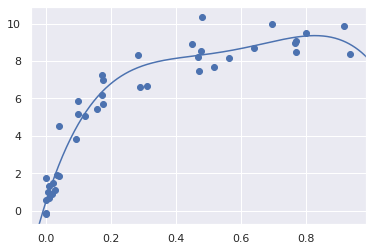

In [75]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);